In [1]:
!pip install tensorflow tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Succes

In [45]:
pip install wurlitzer

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("DiseaseAndSymptoms.csv")
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Total disease: ", df["Disease"].nunique())

Total disease:  41


In [11]:
df["Disease"].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

In [12]:
print("Total sample before droped:", len(df))
df = df.drop_duplicates()
print("Total sample after droped:", len(df))

Total sample before droped: 4920
Total sample after droped: 304


In [111]:
df["Disease"].value_counts()

Disease
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronchial Asthma          

In [13]:
# Find unique value in each column
unique_values = set()
for col in df.columns[1:18]:
    unique_values.update(df[col].unique())

df_unique_values = pd.DataFrame(list(unique_values), columns=['Symptom'])

df_unique_values

,Symptom
0,hip_joint_pain
1,skin_rash
2,continuous_feel_of_urine
3,fast_heart_rate
4,sunken_eyes
...,...
127,slurred_speech
128,malaise
129,mucoid_sputum
130,loss_of_balance


In [112]:
# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.3)
print("jumlah data training: ", len(train_df))
print("jumlah data test: ", len(test_df))

jumlah data training:  212
jumlah data test:  92


In [113]:
# Convert to TensorFlow Datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Disease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="Disease")

In [114]:
# Fit model
model =  tfdf.keras.GradientBoostedTreesModel(verbose = 2)
model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp5a41qwjg as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Symptom_1': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'Symptom_2': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'Symptom_3': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'Symptom_4': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Symptom_5': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'Symptom_6': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'Symptom_7': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'Symptom_8': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Symptom_9': <tf.Tensor 'data_8:0' shape=(None,) dtype=string>, 'Symptom_10': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'Symptom_11': <tf.Tensor 'data_10:0' shape=(None,) dtype=string>, 'Symptom_12': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'Symptom_13': <tf.Tensor 'data_12:0' shape=(None,) dtype=string>, 'Symptom_14': <t

[INFO 24-06-02 20:11:31.8301 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-06-02 20:11:31.8301 UTC kernel.cc:772] Collect training examples
[INFO 24-06-02 20:11:31.8301 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-06-02 20:11:31.8303 UTC kernel.cc:391] Number of batches: 1
[INFO 24-06-02 20:11:31.8303 UTC kernel.cc:392] Number of examples: 212
[INFO 24-06-02 20:11:31.8307 UTC data_spec_inference.cc:305] 16 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Symptom_1 (10 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-06-02 20:11:31.8308 UTC data_spec_inf

Model trained in 0:00:01.554719
Compiling model...


Model compiled.


In [115]:
# Summary of the model structure.
model.summary()

Model: "gradient_boosted_trees_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (16):
	Symptom_1
	Symptom_10
	Symptom_11
	Symptom_12
	Symptom_13
	Symptom_14
	Symptom_15
	Symptom_16
	Symptom_2
	Symptom_3
	Symptom_4
	Symptom_5
	Symptom_6
	Symptom_7
	Symptom_8
	Symptom_9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "Symptom_8"  0.331985 ################
    2.  "Symptom_1"  0.319779 ##############
    3.  "Symptom_5"  0.289142 ##########
    4.  "Symptom_2"  0.283415 ##########
    5.  "Symptom_3"  0.228327 ###
    6.  "Symptom_4"  0.226637 ###
    7.  "Symptom_6"  0.216712 #
    8.  "Symptom_7"  0.213875 #
    9. "Symptom_10"  0.212363 #


In [116]:
# Evaluate model accuracy
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 350ms/step - loss: 0.0000e+00 - accuracy: 0.2174

loss: 0.0000
accuracy: 0.2174


In [117]:
# feature importances
model.make_inspector().variable_importances()

{'NUM_AS_ROOT': [("Symptom_1" (4; #0), 140.0),
  ("Symptom_2" (4; #9), 87.0),
  ("Symptom_4" (4; #11), 51.0),
  ("Symptom_3" (4; #10), 38.0),
  ("Symptom_5" (4; #12), 27.0),
  ("Symptom_10" (4; #1), 26.0),
  ("Symptom_7" (4; #14), 25.0),
  ("Symptom_8" (4; #15), 23.0),
  ("Symptom_13" (4; #4), 17.0),
  ("Symptom_6" (4; #13), 15.0),
  ("Symptom_12" (4; #3), 14.0),
  ("Symptom_15" (4; #6), 12.0),
  ("Symptom_11" (4; #2), 9.0),
  ("Symptom_9" (4; #16), 8.0)],
 'NUM_NODES': [("Symptom_2" (4; #9), 1051.0),
  ("Symptom_5" (4; #12), 1038.0),
  ("Symptom_1" (4; #0), 936.0),
  ("Symptom_6" (4; #13), 546.0),
  ("Symptom_8" (4; #15), 504.0),
  ("Symptom_3" (4; #10), 335.0),
  ("Symptom_4" (4; #11), 312.0),
  ("Symptom_7" (4; #14), 150.0),
  ("Symptom_10" (4; #1), 130.0),
  ("Symptom_9" (4; #16), 77.0),
  ("Symptom_12" (4; #3), 23.0),
  ("Symptom_13" (4; #4), 20.0),
  ("Symptom_11" (4; #2), 17.0),
  ("Symptom_15" (4; #6), 15.0)],
 'SUM_SCORE': [("Symptom_2" (4; #9), 49.390140101239304),
  ("Sympto

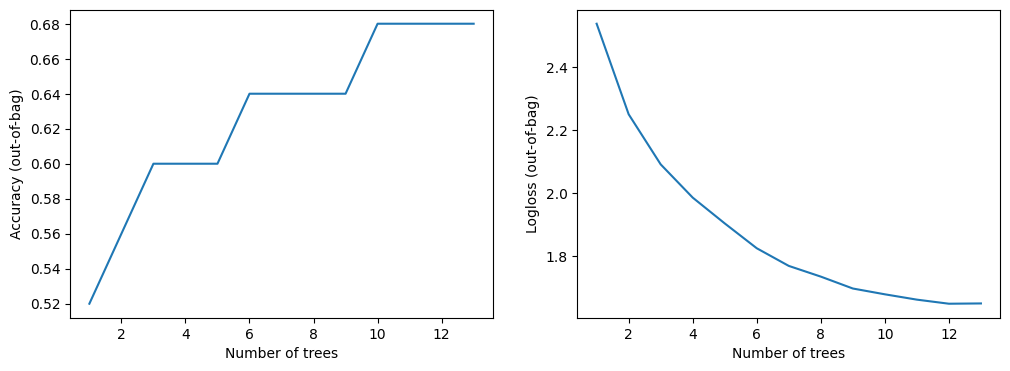

In [118]:
# Plot training logs
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()